In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
72,25.4,6,168.0,116,2900,12.6,41
369,19.0,6,232.0,100,2901,16.0,48
281,31.5,4,89.0,71,1990,14.9,44
387,30.0,4,111.0,80,2155,14.8,45
200,21.0,6,231.0,110,3039,15.0,47


In [3]:
result_dict = {}

In [4]:
def build_model(regression_fn,
                names_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    X = dataset[names_of_x_cols]
    Y = dataset[names_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print('Training score: ', model.score(x_train, y_train))
    print('Test score: ', r2_score(y_test, y_pred))
    
    if show_plot_Y:
        fig, ax = plt.subplots(figsize=(12, 8))
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')

        plt.ylabel(names_of_y_col)
        plt.legend()
        plt.show()
        
    if show_plot_scatter:
        fig, ax = plt.subplots(figsize=(12, 8))
        plt.scatter(x_test, y_test, label='Observed data')
        plt.plot(x_test, y_pred, color='r', label='Predicted line')

        plt.legend()
        plt.show()
    
    return {
        'training_score': model.score(x_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }

In [5]:
def compare_results(result_dict):
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [6]:
def linear_reg(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7037687906738179
Test score:  0.6442953048104537


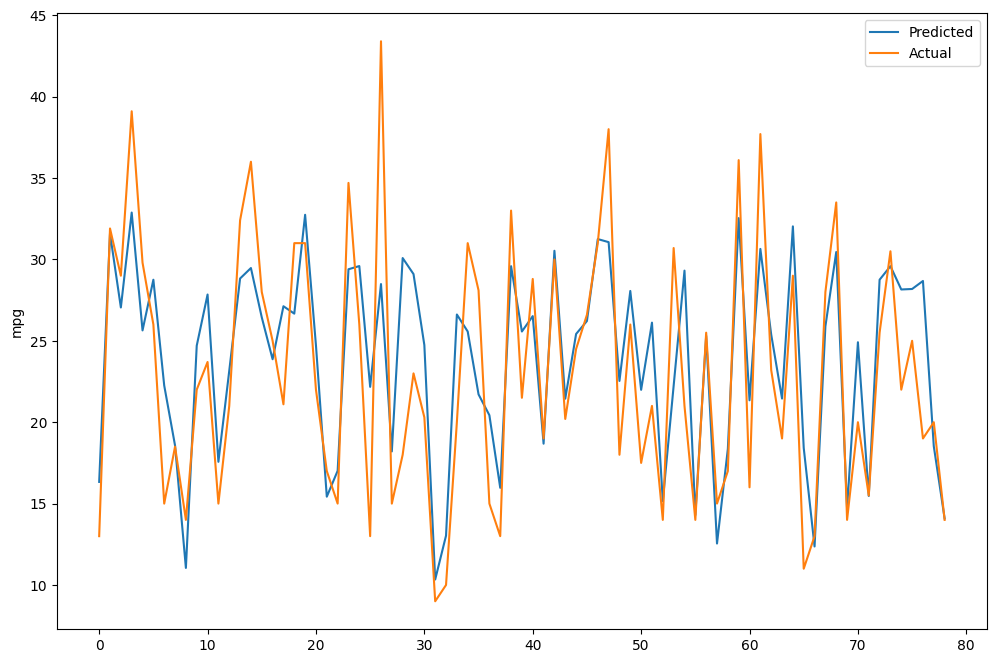

In [7]:
result_dict['mpg-single_linear'] = build_model(linear_reg,
                                              'mpg',
                                              ['weight'],
                                              automobile_df,
                                              show_plot_Y=True)

Training score:  0.7173546720379034
Test score:  0.6616303562857925


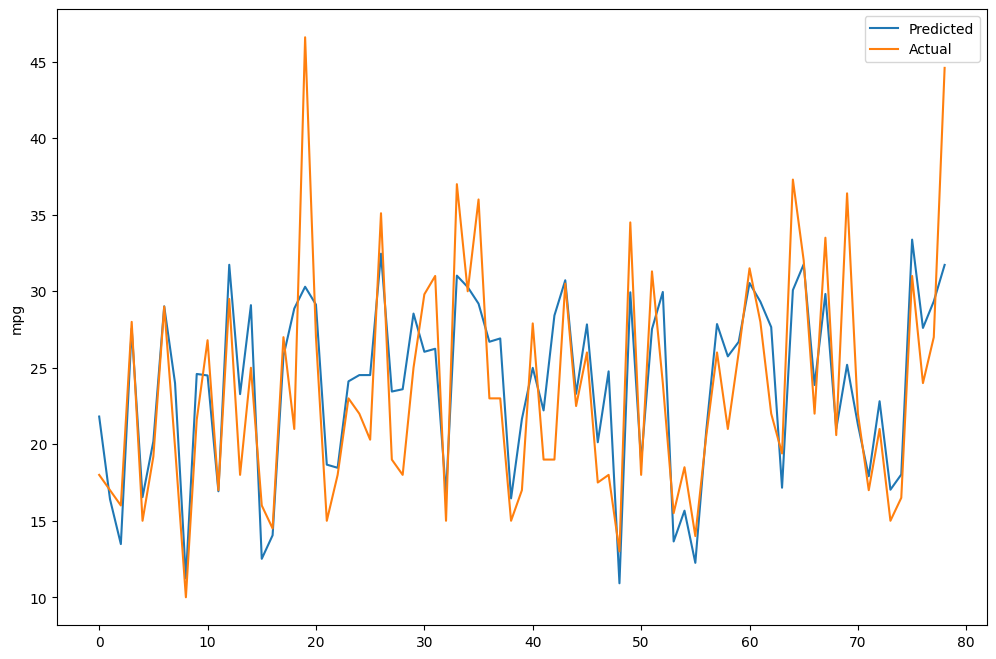

In [8]:
result_dict['mpg-kitchen_sink_linear'] = build_model(linear_reg,
                                              'mpg',
                                              ['cylinders',
                                               'displacement',
                                               'horsepower',
                                               'weight',
                                               'acceleration'],
                                              automobile_df,
                                              show_plot_Y=True)

Training score:  0.7099969452940929
Test score:  0.672481467962968


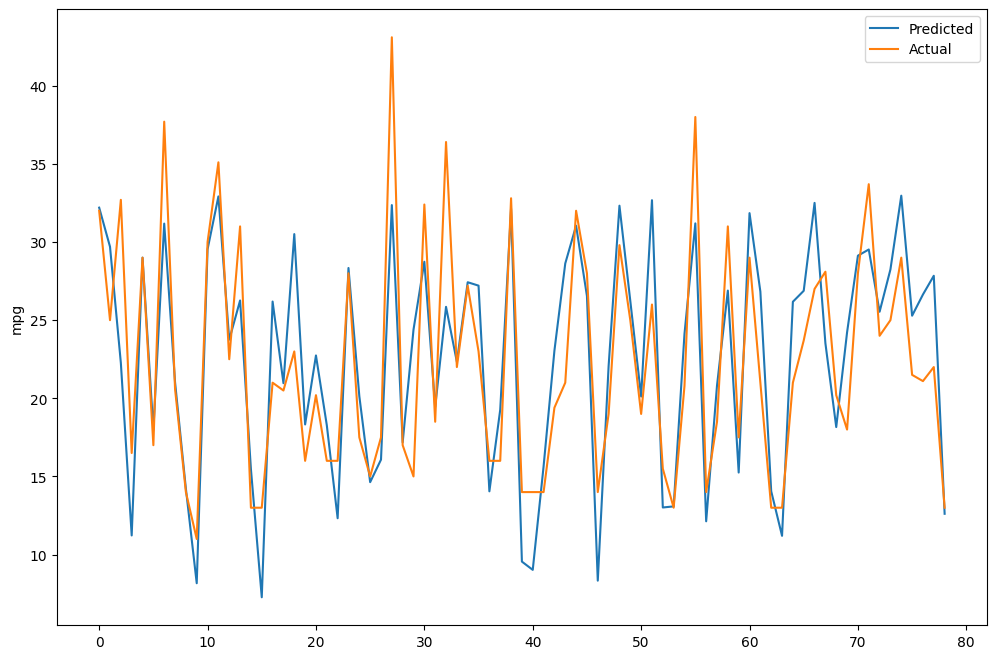

In [9]:
result_dict['mpg-parsimonius'] = build_model(linear_reg,
                                              'mpg',
                                              ['horsepower',
                                               'weight'],
                                              automobile_df,
                                              show_plot_Y=True)

In [10]:
compare_results(result_dict)

Regression:  mpg-single_linear
Training score 0.7037687906738179
Test score 0.6442953048104537

Regression:  mpg-kitchen_sink_linear
Training score 0.7173546720379034
Test score 0.6616303562857925

Regression:  mpg-parsimonius
Training score 0.7099969452940929
Test score 0.672481467962968



In [11]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7132464918951922
Test score:  0.6780501709589299


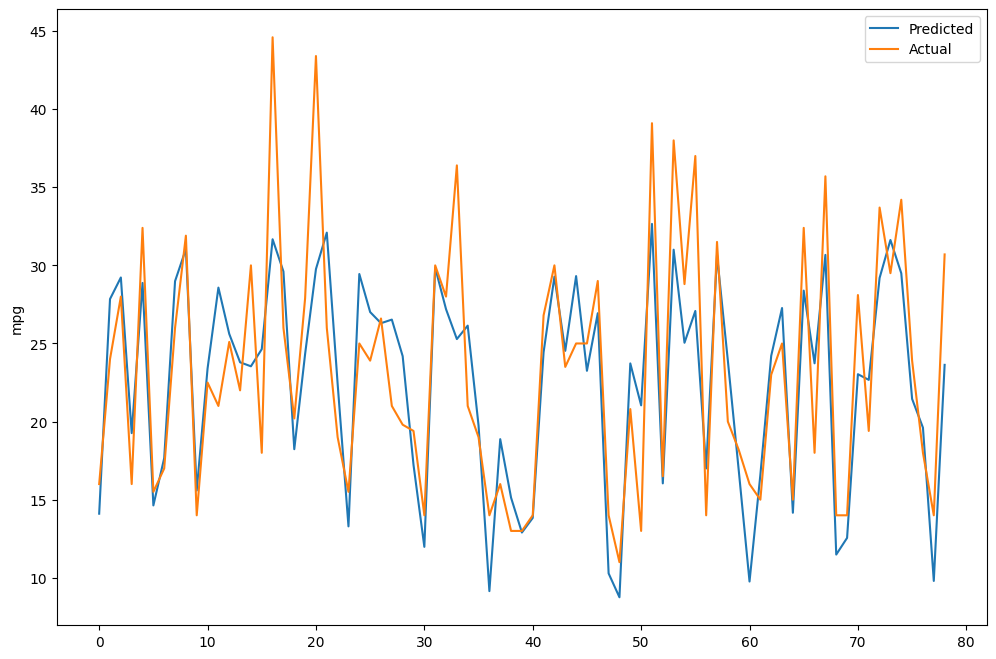

In [12]:
result_dict['mpg-kitchen_sink_lasso'] = build_model(lasso_reg,
                                              'mpg',
                                              ['cylinders',
                                               'displacement',
                                               'horsepower',
                                               'weight',
                                               'acceleration'],
                                              automobile_df,
                                              show_plot_Y=True)

In [13]:
compare_results(result_dict)

Regression:  mpg-single_linear
Training score 0.7037687906738179
Test score 0.6442953048104537

Regression:  mpg-kitchen_sink_linear
Training score 0.7173546720379034
Test score 0.6616303562857925

Regression:  mpg-parsimonius
Training score 0.7099969452940929
Test score 0.672481467962968

Regression:  mpg-kitchen_sink_lasso
Training score 0.7132464918951922
Test score 0.6780501709589299



In [14]:
def ridge_reg(x_train, y_train, alpha=0.5):
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7031935503984565
Test score:  0.7154878571476738


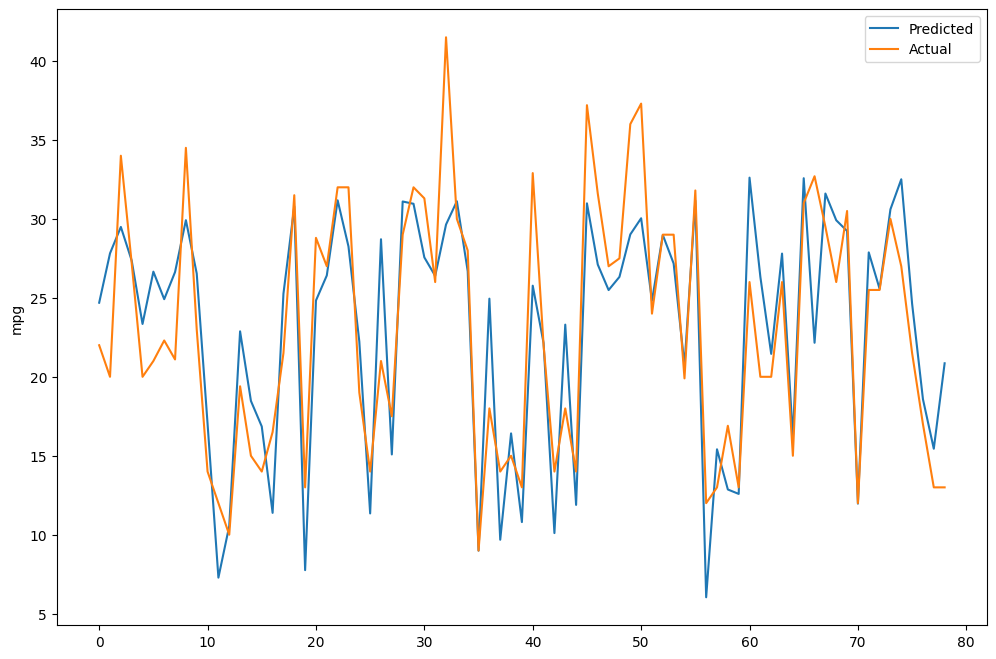

In [15]:
result_dict['mpg-kitchen_sink_ridge'] = build_model(ridge_reg,
                                              'mpg',
                                              ['cylinders',
                                               'displacement',
                                               'horsepower',
                                               'weight',
                                               'acceleration'],
                                              automobile_df,
                                              show_plot_Y=True)

In [16]:
compare_results(result_dict)

Regression:  mpg-single_linear
Training score 0.7037687906738179
Test score 0.6442953048104537

Regression:  mpg-kitchen_sink_linear
Training score 0.7173546720379034
Test score 0.6616303562857925

Regression:  mpg-parsimonius
Training score 0.7099969452940929
Test score 0.672481467962968

Regression:  mpg-kitchen_sink_lasso
Training score 0.7132464918951922
Test score 0.6780501709589299

Regression:  mpg-kitchen_sink_ridge
Training score 0.7031935503984565
Test score 0.7154878571476738



In [17]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, 
                    max_iter=100000, warm_start=True, equivalent_to='Elastic Net'):
    print('Equivalent to: ', equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)
    
    return model

Equivalent to:  OLS
Training score:  0.7094725450507593
Test score:  0.6955625737831517


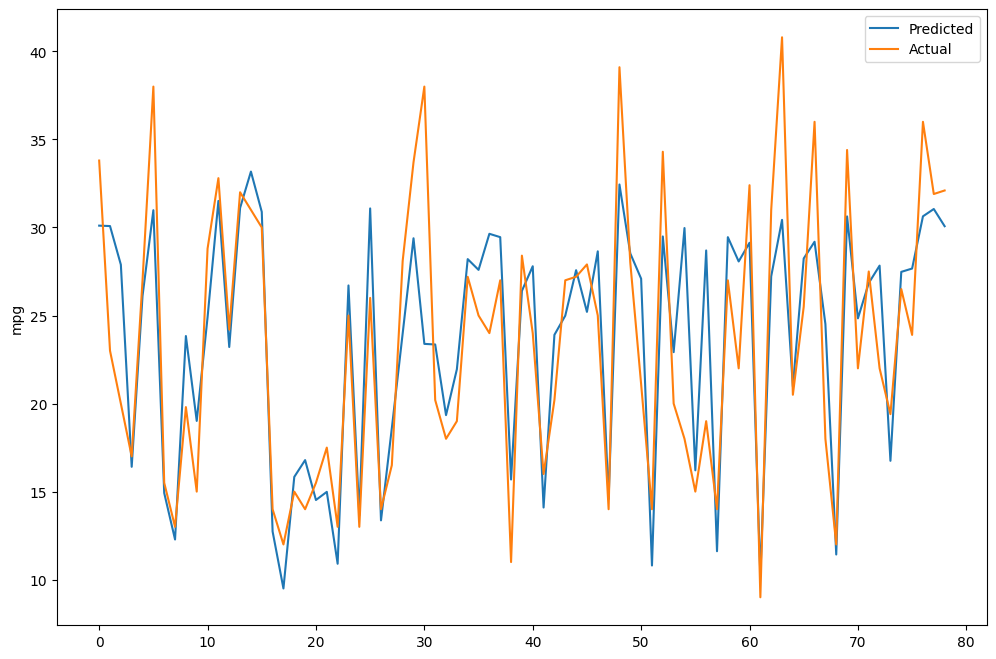

In [22]:
from functools import partial
result_dict['mpg-kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg, alpha=0, equivalent_to='OLS'),
                                              'mpg',
                                              ['cylinders',
                                               'displacement',
                                               'horsepower',
                                               'weight',
                                               'acceleration'],
                                              automobile_df,
                                              show_plot_Y=True)

Equivalent to:  Lassio
Training score:  0.7039605046504414
Test score:  0.711988879154138


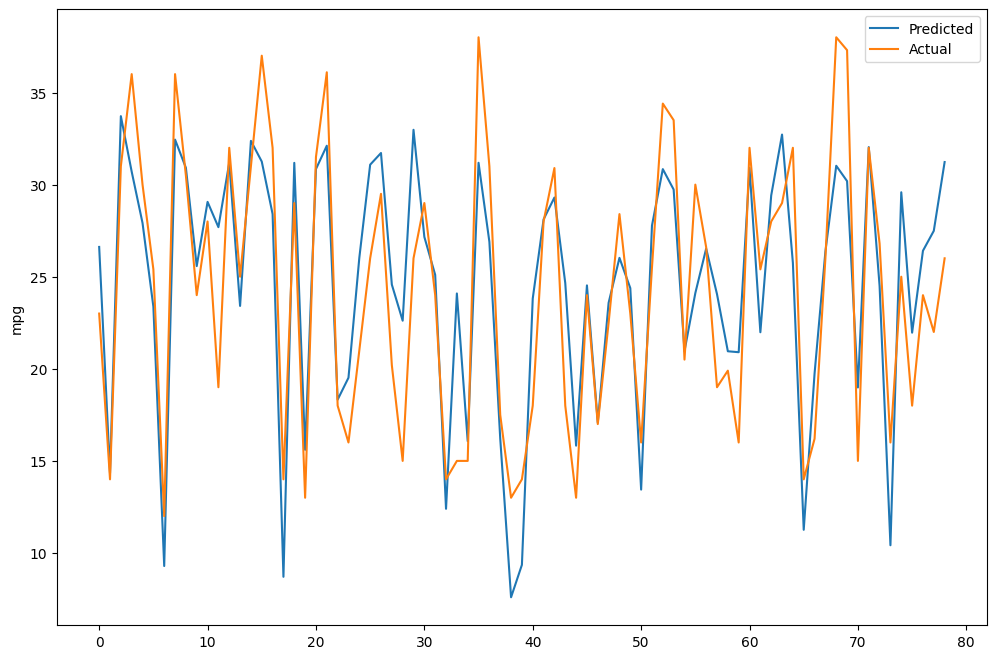

In [19]:
result_dict['mpg-kitchen_sink_elastic_net_lassio'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                      l1_ratio=1, equivalent_to='Lassio'),
                                              'mpg',
                                              ['cylinders',
                                               'displacement',
                                               'horsepower',
                                               'weight',
                                               'acceleration'],
                                              automobile_df,
                                              show_plot_Y=True)

Equivalent to:  Ridge
Training score:  0.6938736265932006
Test score:  0.750821324958644


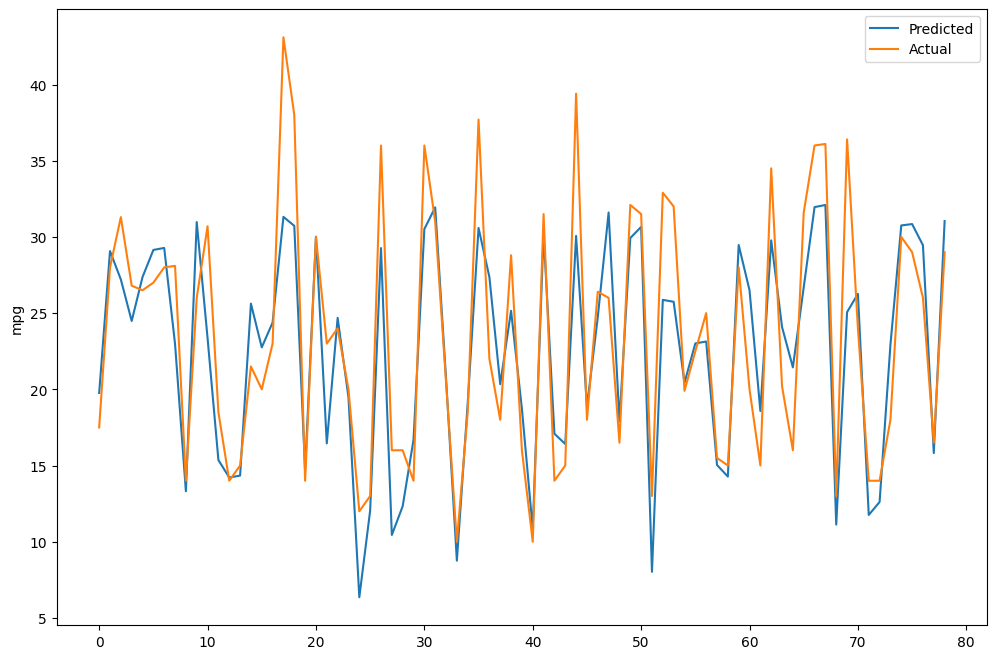

In [21]:
result_dict['mpg-kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                      l1_ratio=0, equivalent_to='Ridge'),
                                              'mpg',
                                              ['cylinders',
                                               'displacement',
                                               'horsepower',
                                               'weight',
                                               'acceleration'],
                                              automobile_df,
                                              show_plot_Y=True)

Equivalent to:  Elastic net
Training score:  0.7164758815302685
Test score:  0.6580848939092897


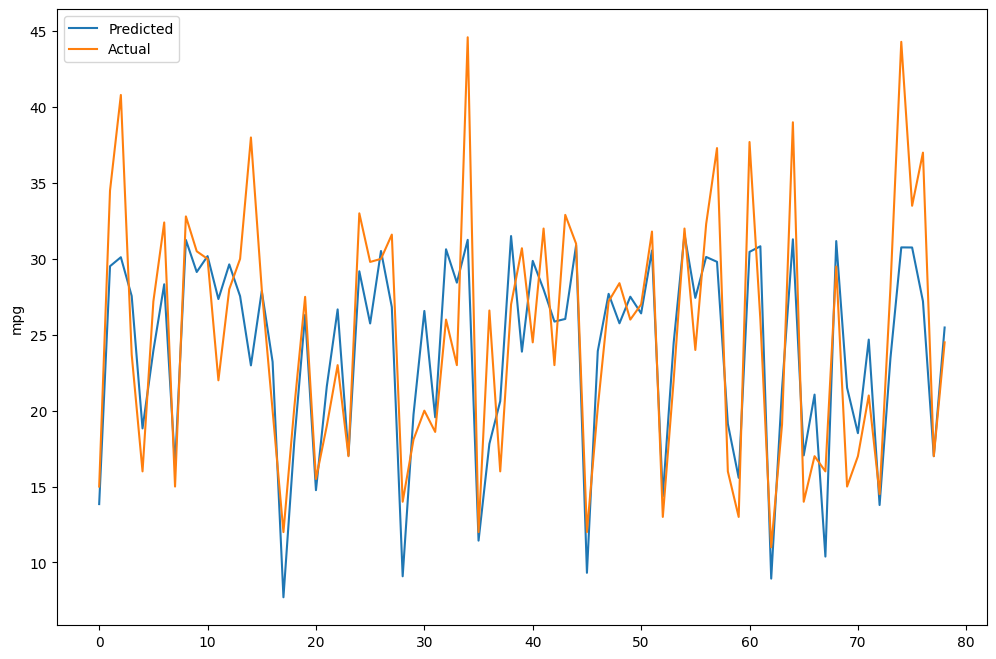

In [24]:
result_dict['mpg-kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                      l1_ratio=0.5, equivalent_to='Elastic net'),
                                              'mpg',
                                              ['cylinders',
                                               'displacement',
                                               'horsepower',
                                               'weight',
                                               'acceleration'],
                                              automobile_df,
                                              show_plot_Y=True)

In [25]:
compare_results(result_dict)

Regression:  mpg-single_linear
Training score 0.7037687906738179
Test score 0.6442953048104537

Regression:  mpg-kitchen_sink_linear
Training score 0.7173546720379034
Test score 0.6616303562857925

Regression:  mpg-parsimonius
Training score 0.7099969452940929
Test score 0.672481467962968

Regression:  mpg-kitchen_sink_lasso
Training score 0.7132464918951922
Test score 0.6780501709589299

Regression:  mpg-kitchen_sink_ridge
Training score 0.7031935503984565
Test score 0.7154878571476738

Regression:  mpg-kitchen_sink_elastic_net_ols
Training score 0.7094725450507593
Test score 0.6955625737831517

Regression:  mpg-kitchen_sink_elastic_net_lassio
Training score 0.7039605046504414
Test score 0.711988879154138

Regression:  mpg-kitchen_sink_elastic_net_ridge
Training score 0.6938736265932006
Test score 0.750821324958644

Regression:  mpg-kitchen_sink_elastic_net
Training score 0.7164758815302685
Test score 0.6580848939092897

